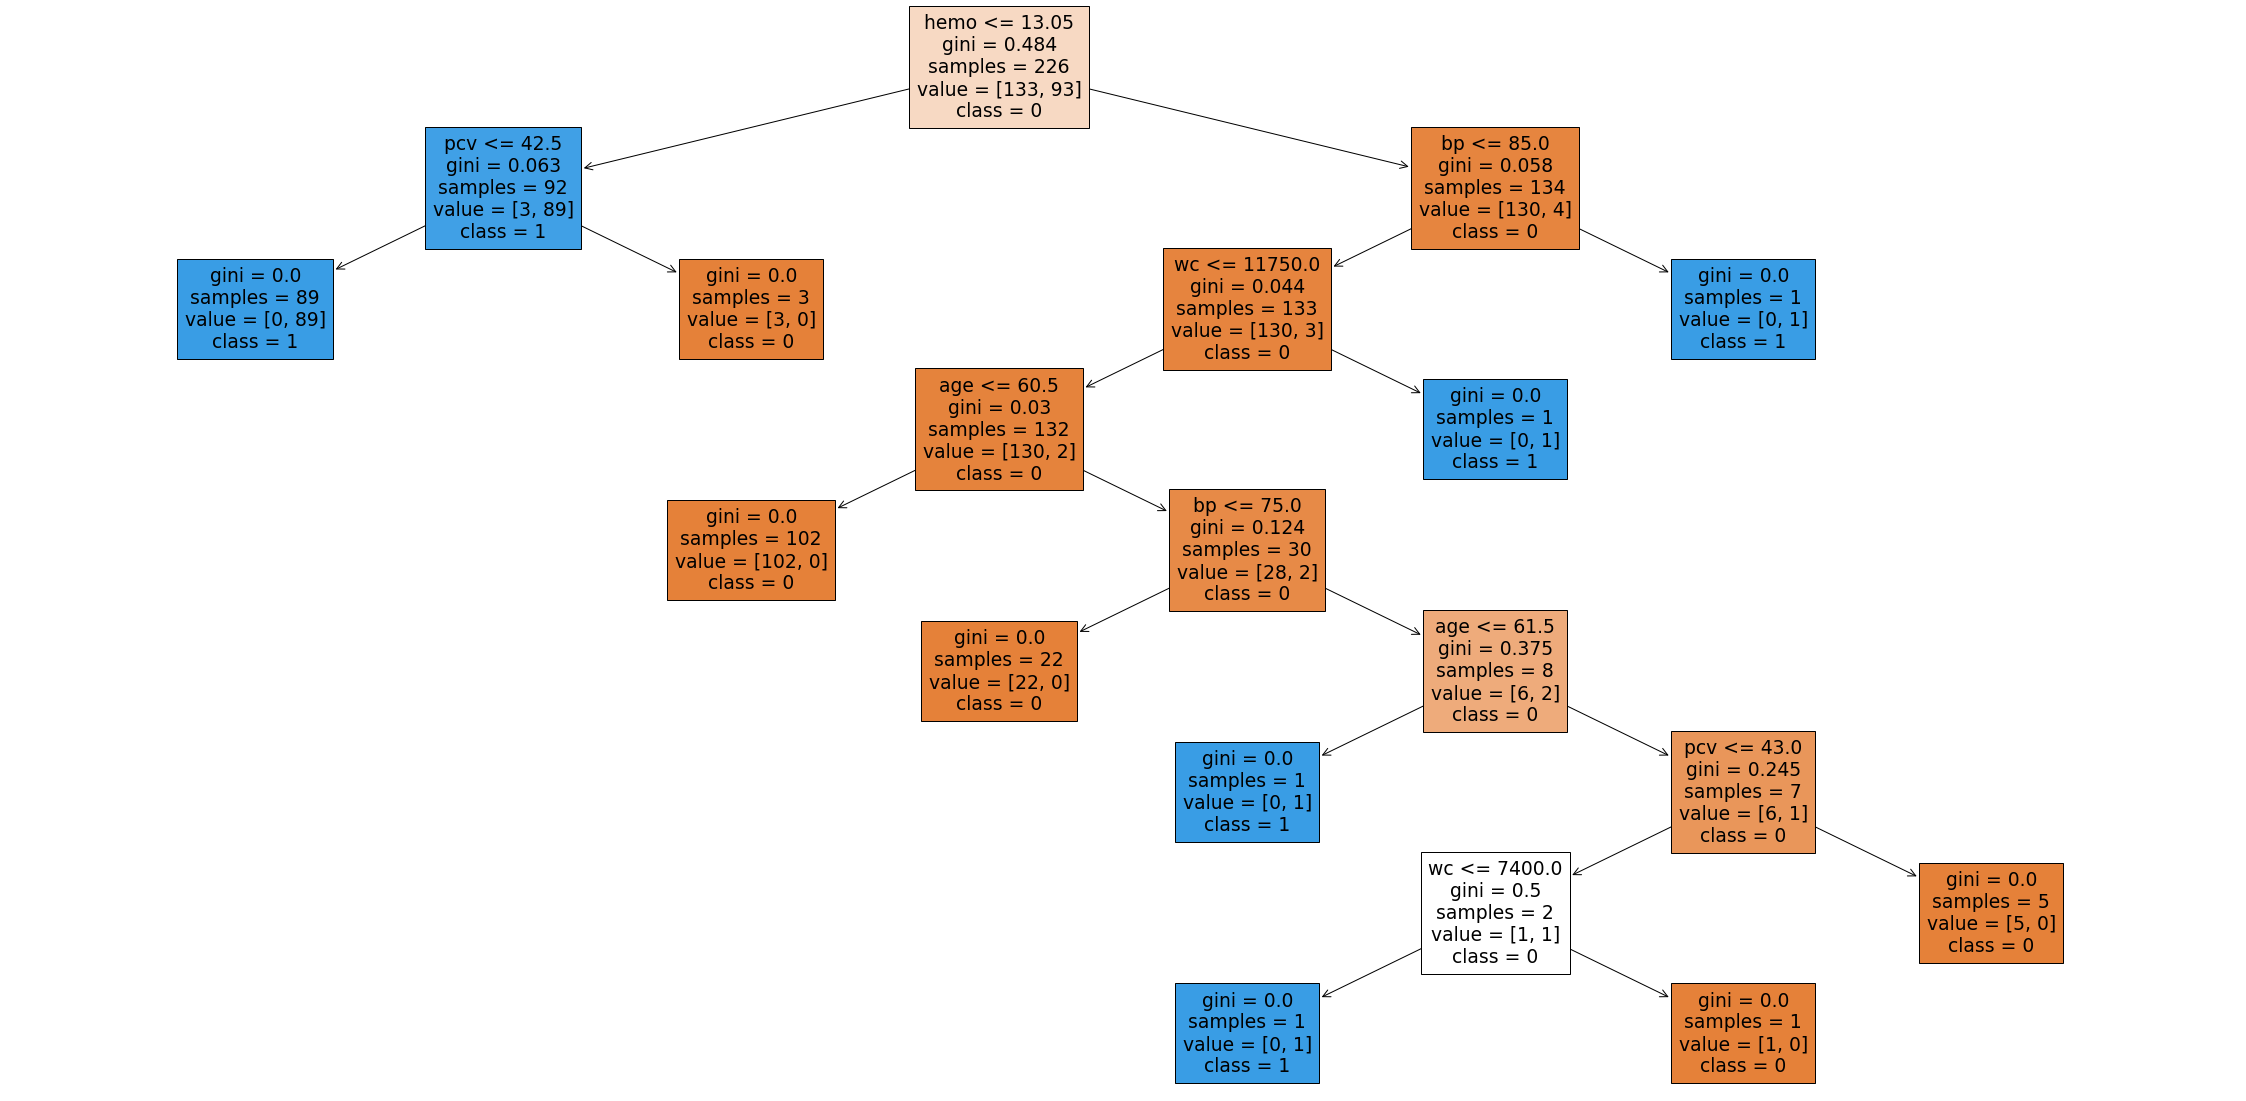

In [6]:
#question 1
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt


data = pd.read_csv('kidney_disease.csv')

X, y = data.drop(['ckd'],axis=1), data[['ckd']]

feature_names = list(X.columns)

model = tree.DecisionTreeClassifier()
model = model.fit(X,y)
model.predict(X)

fig = plt.figure(figsize=(40,20))
fig = tree.plot_tree(model, feature_names = feature_names, class_names=['0','1'], filled = True)
plt.savefig('tree.pdf')
#person A does not have kidney disease
#person B does have kideny disease

In [25]:
#question 2
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_diabetes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 

#load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

scaler = MinMaxScaler()
y = y.reshape (-1,1)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

models = Sequential()
input_layer = InputLayer(input_shape=(10,))
models.add (input_layer)
hidden_layer = Dense(8)
models.add (hidden_layer)
output_layer = Dense(1, activation = 'relu')
models.add (output_layer)

models.compile(loss = 'binary_crossentropy')
models.fit(X_train, y_train, epochs = 10)
y_pred = models.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
5/5 [==============================] - 2s 8ms/step - loss: 2.4925
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 1.5967
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 1.2249
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 1.1634
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0894
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0220
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 0.9884
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 0.9328
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 0.8673
Epoch 10/10
10/10 [==============================] - 0s 5ms/step
0.27104730658410425


In [24]:
#without 'relu' activation
from sklearn.metrics import mean_absolute_error 

models = Sequential()
input_layer = InputLayer(input_shape=(10,))
models.add (input_layer)
hidden_layer = Dense(8)
models.add (hidden_layer)
output_layer = Dense(1)
models.add (output_layer)

models.compile(loss = 'binary_crossentropy')
models.fit(X_train, y_train, epochs = 10)

y_pred = models.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
5/5 [==============================] - 17s 15ms/step - loss: 4.1583
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 4.0051
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 3.5839
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 3.0620
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 2.7518
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 2.2351
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 2.1450
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 1.5964
Epoch 9/10
5/5 [==============================] - 0s 25ms/step - loss: 1.2453
Epoch 10/10
10/10 [==============================] - 0s 5ms/step
0.25912804840260434


In [46]:
#question 4
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.utils import to_categorical

#load datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

number_of_training_instances = X_train.shape[0]
number_of_testing_instances = X_test.shape[0]

# reshape dataset
X_train = X_train.reshape((number_of_training_instances, 28*28))
X_test = X_test.reshape((number_of_testing_instances, 28*28))

tf.random.set_seed(1)
model1 = Sequential()
input_layer = InputLayer(input_shape=(28*28,))
model1.add (input_layer)
hidden_layer = Dense((28*28)/2)
model1.add (hidden_layer)
output_layer = Dense(10, activation = 'softmax')
model1.add (output_layer)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model1.compile(loss = 'categorical_crossentropy', 
               metrics =['accuracy'])

X_train.shape

model1.fit(X_train, y_train, epochs = 10)

y_pred = model1.predict(X_test)
print (y_pred)
performance = model1.evaluate(X_test, y_test)

print(performance[1])
model1.save('digits_model.h5')

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 23.4550 - accuracy: 0.8405
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.8348 - accuracy: 0.8420
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 4.0376 - accuracy: 0.8529
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 3.7665 - accuracy: 0.8569
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 3.7957 - accuracy: 0.8604
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 3.6938 - accuracy: 0.8645
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 3.6879 - accuracy: 0.8657
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 3.7120 - accuracy: 0.8676
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 3.6429 - accuracy: 0.8676
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
[[0.0000000e+0